# 1. Fetching the dataset

In [ ]:
# Fetching the dataset from github
!wget https://raw.githubusercontent.com/blakelobato/Predicting-Asteroid-Diameter-Dash/master/model/Pred_Ast_Diam_2.csv

--2023-08-20 22:22:10--  https://raw.githubusercontent.com/blakelobato/Predicting-Asteroid-Diameter-Dash/master/model/Pred_Ast_Diam_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32261335 (31M) [text/plain]
Saving to: ‘Pred_Ast_Diam_2.csv.1’

Pred_Ast_Diam_2.csv 100%[===================>]  30.77M   158MB/s    in 0.2s    

2023-08-20 22:22:11 (158 MB/s) - ‘Pred_Ast_Diam_2.csv.1’ saved [32261335/32261335]



# 2. Data Exploration and Analysis

In [ ]:
import pandas as pd # For data processing, storing
import matplotlib.pyplot as plt # For plots and visualization
import seaborn as sns  # Prettier plots and viz
import numpy as np # To deal with arrays and matrices

In [ ]:
# Reading the input csv file
df = pd.read_csv("./Pred_Ast_Diam_2.csv")

In [ ]:
# Inspecting the first few rows to get an idea about the data
df.head()

,orbit_id,e,a,i,om,w,ma,n,tp,moid,...,data_arc,n_obs_used,rms,diameter,albedo,diameter_sigma,first_year_obs,first_month_obs,last_obs_year,last_obs_month
0,JPL 35,0.242027,2.201791,2.536221,313.311389,18.989048,301.072249,0.301675,2.458796e+06,0.657747,...,46399.0,2611,0.46222,9.300,0.2082,0.800,1892,10,2019,10
1,JPL 25,0.256856,2.338209,22.326589,10.489602,105.115594,87.454449,0.275663,2.458283e+06,0.875501,...,38117.0,1528,0.38116,9.822,0.3140,0.130,1915,4,2019,8
2,JPL 28,0.160543,2.228812,1.747387,121.579382,252.465454,208.942016,0.296206,2.459110e+06,0.871683,...,36040.0,2357,0.44671,8.196,0.3790,0.100,1920,9,2019,5
3,JPL 35,0.167945,2.241299,2.428619,161.636895,172.846491,20.350289,0.293734,2.458531e+06,0.854020,...,33289.0,2574,0.43691,6.534,0.2170,0.068,1928,10,2019,11
4,JPL 34,0.253295,2.467536,6.757106,137.130656,259.158793,127.366908,0.254278,2.458100e+06,0.862972,...,39907.0,2523,0.44695,9.111,0.2560,0.303,1910,2,2019,5


In [ ]:
# The list of all features
df.columns

Index(['orbit_id', 'e', 'a', 'i', 'om', 'w', 'ma', 'n', 'tp', 'moid',
       'moid_jup', 'class', 'producer', 'data_arc', 'n_obs_used', 'rms',
       'diameter', 'albedo', 'diameter_sigma', 'first_year_obs',
       'first_month_obs', 'last_obs_year', 'last_obs_month'],
      dtype='object')

## Dataset Description




*   orbit_id : Orbital Solution ID
*   e : Eccentricity (Number)
*   a : Semi major axis (au)
*   q : Perihelion distance (au)
*   i : Inclination (deg)
*   om : Longitude of ascending node (deg)
*   w : Argument of perihelion (deg)
*   ma : Mean anomaly (deg)
*   tp : Time of perihelion passage in Julian day form (TDB)
*   n : Mean motion (deg/d)
*   moid : Minimum distance between earth and small body (au)
*   moid_jup: Minimum distance between orbits of Jupiter and small body (au)
*   data_arc : Number of days spanned by observations used in orbit determination (days)
*   n_obs_used : Total number of observations used
*   albedo : Geometric Albedo
*   diameter: effective body diameter (km)
*   class : Orbit classification
*   produce : Name of the person who computed the orbit
*   rms : Root mean squared of the orbit fit (arcsec)
*   first_year_obs: The year of the first observation
*   first_month_obs: The month of the first observation
*   last_year_obs: The year of the last observation
*   last_month_obs: The month of the last observation





In [ ]:
# The dataset contains 126497 samples and 23 features
df.shape

(126497, 23)

In [ ]:
# Some statistical measures about the numeric features
df.describe()

,e,a,i,om,w,ma,n,tp,moid,moid_jup,data_arc,n_obs_used,rms,diameter,albedo,diameter_sigma,first_year_obs,first_month_obs,last_obs_year,last_obs_month
count,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,1.264970e+05,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000
mean,0.146644,2.756965,10.203665,169.819406,181.823887,182.532163,0.223042,2.458473e+06,1.372152,2.103674,8327.433417,619.322261,0.556354,4.162426,0.133238,0.459791,1995.518985,6.819292,2018.317351,6.839364
std,0.076841,0.453027,6.689924,102.749965,103.538522,103.416049,0.054299,8.544471e+02,0.381999,0.401889,4652.967177,518.067224,0.091134,1.933024,0.112034,0.404647,11.947776,3.534653,2.010448,3.590190
min,0.000488,0.626226,0.021855,0.000929,0.004466,0.000517,0.001698,2.451624e+06,0.000166,0.005081,1.000000,5.000000,0.054414,0.008000,0.001000,0.001000,1892.000000,1.000000,2000.000000,1.000000
25%,0.091182,2.510297,5.051481,82.100534,91.822257,93.746347,0.182872,2.458154e+06,1.068410,1.837530,6295.000000,217.000000,0.520510,2.701000,0.053000,0.183000,1993.000000,3.000000,2019.000000,4.000000
50%,0.140047,2.729370,9.244113,160.539684,183.660501,185.542573,0.218580,2.458589e+06,1.353690,2.112610,7527.000000,471.000000,0.554530,3.787000,0.080000,0.337000,1998.000000,8.000000,2019.000000,6.000000
75%,0.192297,3.074005,13.538838,256.258893,271.540490,270.957509,0.247809,2.459022e+06,1.672490,2.385130,9425.000000,901.000000,0.589510,5.265000,0.196000,0.617000,2001.000000,10.000000,2019.000000,11.000000
max,0.968381,69.576833,158.535394,359.990858,359.995174,359.999226,1.988877,2.461586e+06,4.035760,4.419670,46399.000000,4611.000000,8.632100,10.240000,1.000000,22.277000,2014.000000,12.000000,2019.000000,12.000000


#### We will need to scale our input variables as their magnitudes are on different scales

In [ ]:
# To split our data
from sklearn.model_selection import train_test_split

# To use as baseline model
from sklearn.dummy import DummyRegressor

In [ ]:
df.reset_index(drop = True, inplace = True)

#### Splitting into input features and target feature

In [ ]:
# Separate into X and y
X = df.drop(['diameter'], axis = 1)
y = df['diameter']

We split the dataset into three parts:
1. Train set - The set of data that will be used to train our models
2. Validation set - The set of data that we will test our model on to configure hyperparameters and select the best model
3. Test set - The set of data that will simply be used to test the predictive power of our model, how well it generalizes to unseen data, etc.

In [ ]:
# Split into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

#### Baseline (dummy) model to establish a baseline performing model

It will always predict the mean of the data

In [ ]:
baseline = DummyRegressor(strategy = "mean")
baseline.fit(X_train, y_train)

DummyRegressor()

We will use Mean Absolute Error (MAE), Mean Squared Error (MSE), and others, but our main focus will be on MSE and R^2 score.

MSE is the average of the squares of the errors between predicted value and true value. It penalizes outliers more than the MAE, as it squares the errors

R^2 score indicates how much of the variation of the target variable can be explained by the input features.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Helper function to print the relevant metrics
def print_metrics(model, pipeline = None, test = False):
    # If test data
    if test:
        # First transform using pipeline if provided
        data = pipeline.transform(X_test) if pipeline else X_test
        true_preds = y_test

    # If validation data
    else:
        data = pipeline.transform(X_val) if pipeline else X_val
        true_preds = y_val

    preds = model.predict(data)
    mae = mean_absolute_error(true_preds, preds)
    mse = mean_squared_error(true_preds, preds)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(true_preds, preds)
    r2 = r2_score(true_preds, preds)

    if test:
        print("[*] TEST SET PERFORMANCE")
    else:
        print("[*] VALIDATION SET PERFORMANCE")
    print(f"Mean Absolute Error: {mae:.2f} kilometers")
    print(f"Mean Squared Error: {mse:.2f} kilometers")
    print(f"Root Mean Squared Error: {rmse:.2f} kilometers")
    print(f"Mean Absolute Percentage Error: {mape * 100:.2f}%")
    print(f"R2 Score: {r2 * 100:.2f}%")



In [ ]:
print_metrics(baseline)

[*] VALIDATION SET PERFORMANCE
Mean Absolute Error: 1.55 kilometers
Mean Squared Error: 3.73 kilometers
Root Mean Squared Error: 1.93 kilometers
Mean Absolute Percentage Error: 54.77%
R2 Score: -0.00%


#### The errors are quite high as the diameters of asteroids are not on a very large scale.


### Visualizing different distributions

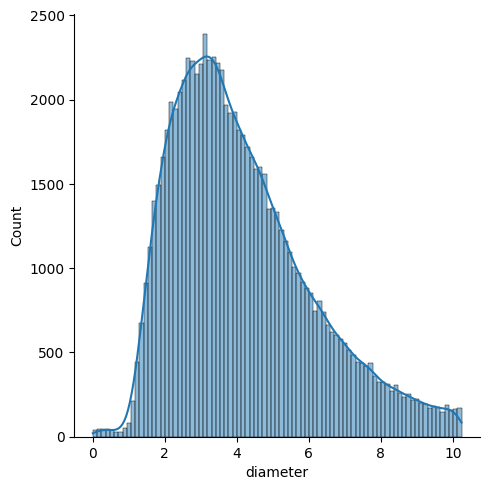

In [ ]:
# Distribution plot of the target variable
sns.displot(y_train, kde = True)

In [ ]:
# Total number of orbits with more than 200 samples
 (df['orbit_id'].value_counts() > 200).sum()

31

#### There are only 31 orbit IDs that have more than 200 instances! That's surprising considering there are about 250 IDs in total

In [ ]:
# Total number of samples for each producer
df['producer'].value_counts()

Otto Matic           126490
Davide Farnocchia         4
Giorgini                  2
Ryan S. Park              1
Name: producer, dtype: int64

In [ ]:
# Total number of samples for each class
df['class'].value_counts()

MBA    118581
OMB      6122
IMB       567
APO       429
MCA       342
AMO       224
TJN       130
ATE        87
CEN        11
AST         2
TNO         2
Name: class, dtype: int64

#### Even for the class and producer features, many of them are imbalanced against others.

#### Future Work: Deal with these imbalances by reducing the number of underrepresented categories

<Axes: xlabel='last_obs_month', ylabel='count'>

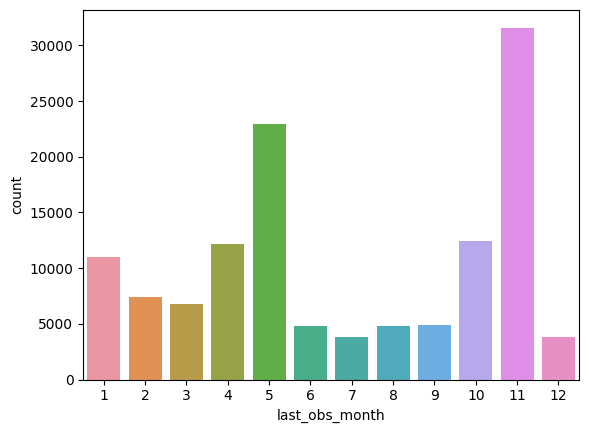

In [ ]:
# Plot the last_obs_month
sns.countplot(x = df['last_obs_month'])

<Axes: xlabel='last_obs_year', ylabel='count'>

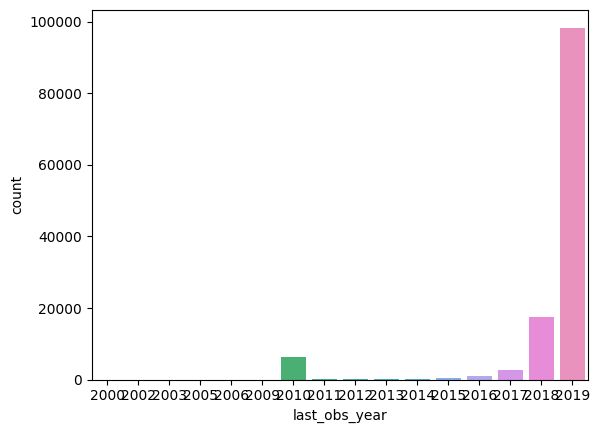

In [ ]:
# Plot last_obs_year
sns.countplot(x = df['last_obs_year'])

#### The feature last_obs_year is also extremely skewed, with dates going as far back as 2000.

In [ ]:
# Number of samples by last_obs_year
df.groupby('last_obs_year').size()

last_obs_year
2000        1
2002        1
2003        1
2005        1
2006        2
2009        1
2010     6356
2011       39
2012       24
2013       44
2014      212
2015      435
2016      912
2017     2683
2018    17401
2019    98384
dtype: int64

In [ ]:
# Number of samples by first_year_obs
df.groupby('first_year_obs').size()

first_year_obs
1892       1
1898       1
1900       1
1903       6
1904       6
        ... 
2010    8322
2011       8
2012       2
2013       7
2014      56
Length: 114, dtype: int64

#### In both first_year_obs and last_obs_year, most years have very low samples.

#### Also, the features are simple numerical features which implies false information such as the year 2020 being greater or more important than 2000.

#### Maybe in some cases where our target increases or decreases with time, this might work, but here we are predicting asteroid diameter, so it shouldn't follow a linear relationship with time such that it increases or decreases as time passes by.

In [ ]:
df_mod = df.copy()
df_mod['last_obs_year'] = df['last_obs_year'].astype("string")
df_mod['first_year_obs'] = df['first_year_obs'].astype("string")
df_mod['last_obs_year']

0         2019
1         2019
2         2019
3         2019
4         2019
          ... 
126492    2016
126493    2016
126494    2019
126495    2016
126496    2019
Name: last_obs_year, Length: 126497, dtype: string

#### To confirm our argument that the diameter is not correlated with the 'first_year_obs', let's look at this plot

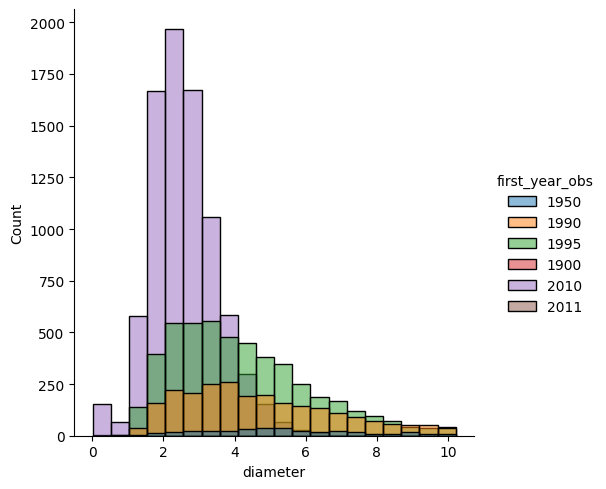

In [ ]:
# Plotting the diameter split by the first_year_obs values
sns.displot(df_mod.apply(lambda row: row[df_mod['first_year_obs'].isin(['1890', '1900', '1950', '1990', '1995','2010', '2011'])]), x = 'diameter', hue = 'first_year_obs', bins = 20)

#### We can see that most observations' diameter is centered around the same area, even though the years are far apart, this confirms our previous statement.

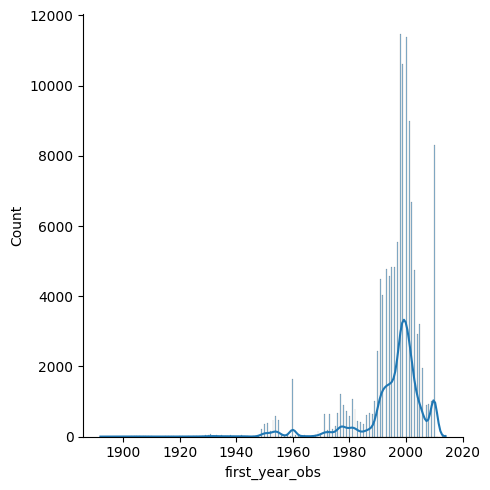

In [ ]:
# Plotting first_year_obs distribution
sns.displot(df, x = "first_year_obs", kde = True)

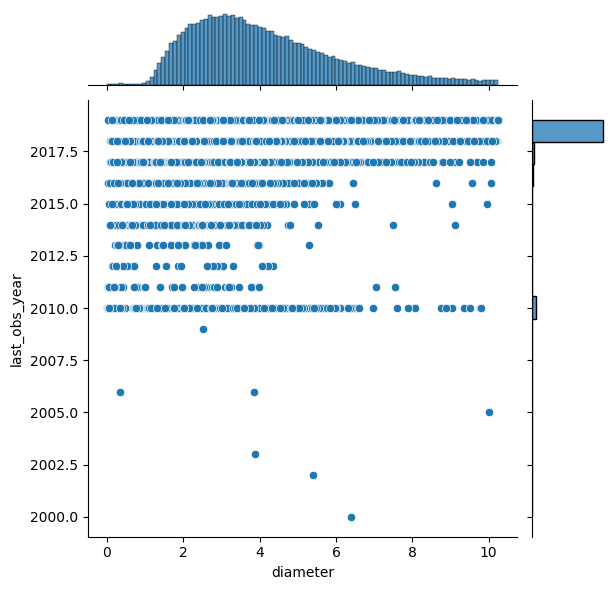

In [ ]:
# Plotting diameter vs last_obs_year
sns.jointplot(df, y = "last_obs_year", x = "diameter")

#### As you can see, the diameter does not vary with change in time.

Although, values such as 2006 and 2005 may act as outliers and introduce bias in our model.

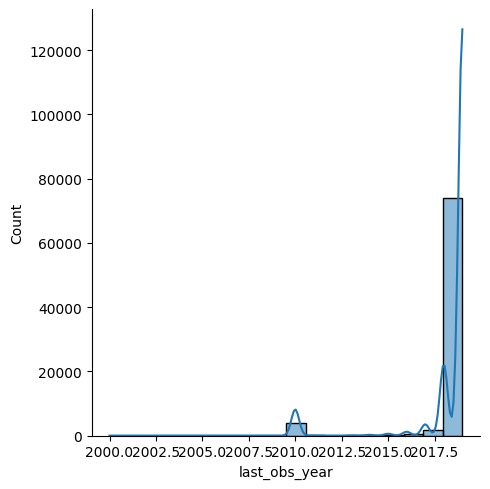

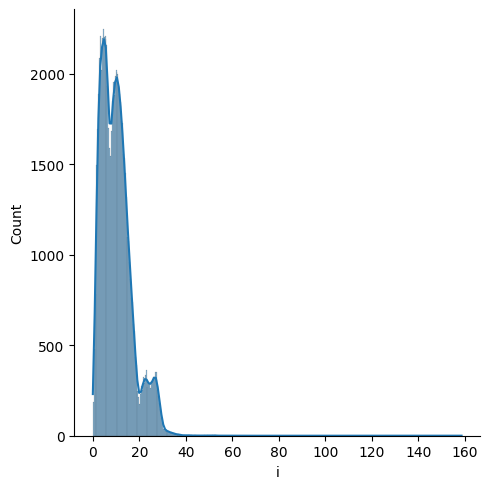

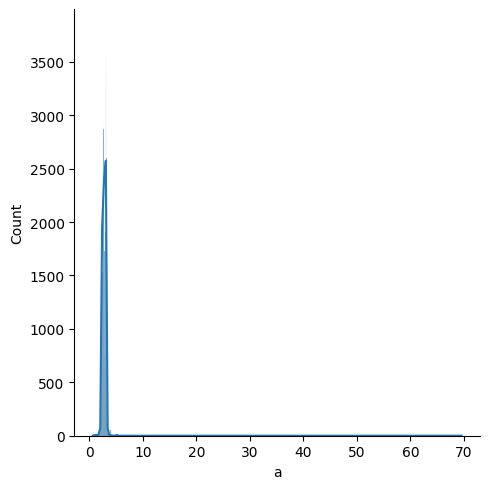

In [ ]:
sns.displot(X_train, x = 'last_obs_year', kde = True)
sns.displot(X_train, x = "i", kde = True)
sns.displot(X_train, x = "a", kde = True)

### Dealing with outliers!

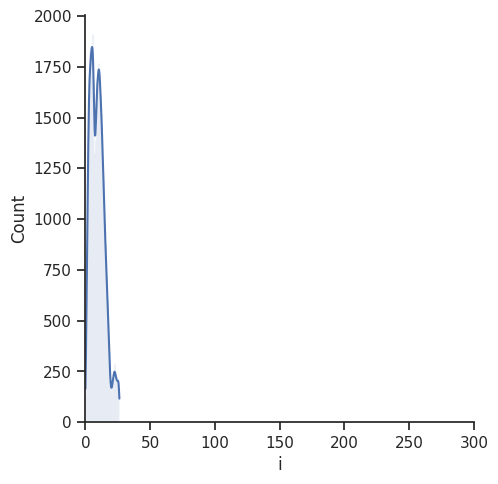

In [ ]:
sns.displot(X_train, x = 'i', kde = True)
plt.xlim(-0.1, 300)
plt.savefig("i_skew.png", dpi = 300)

In [ ]:
print(f"Samples with 'i' greater than 35: {X_train[X_train['i'] > 35].shape[0]}")
print(f"Samples with 'i' smaller than 35: {X_train[X_train['i'] <= 35].shape[0]}")

Samples with 'i' greater than 35: 124
Samples with 'i' smaller than 35: 80833


The feature 'i' is incredibly right-skewed, indicating the presence of outliers.

#### To deal with outliers, we will make use of Inter-Quantile Ranges.

#### Inter-Quantile range measures the spread of data, which is defined as the difference between the 75% and 25% percentiles of data.

#### A recommended way to get rid of outliers is to only keep the samples in the range (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

In [ ]:
# Helper function to deal with outliers using IQR ranges and return the cleaned data if required
def outlier_control(data, col, plot = False, ret = False):

    # Calculate the 25th percentile
    quantile_25 = data[col].quantile(.25)

    # Calculate the 75th percentile
    quantile_75 = data[col].quantile(.75)
    iqr = quantile_75 - quantile_25
    print(f"25% Quantile for {col}: {quantile_25}\n75% Quantile for {col}: {quantile_75}")

    # The IQR limits
    lower_limit = quantile_25 - 1.5 * iqr
    upper_limit = quantile_75 + 1.5 * iqr

    print(f"The limit for {col} is {lower_limit} <= i <= {upper_limit}")
    print(f"Samples outside the range: {data.loc[(data[col] < lower_limit) | (data[col] > upper_limit)].shape[0]}")
    print(f"Samples inside the range: {data.loc[(data[col] >= lower_limit) & (data[col] <= upper_limit)].shape[0]}")

    # Modified data that is in the specified range
    mod_data = data.loc[(data[col] >= lower_limit) & (data[col] <= upper_limit)]

    if plot:
        mod_data = data.loc[(data[col] >= lower_limit) & (data[col] <= upper_limit)]
        displot = sns.displot(mod_data, x = col, kde = True)
        plt.title(f"Distribution of feature {col} without outliers")
        plt.xlim(lower_limit - 0.1, upper_limit + 0.1)
    if ret:
        return mod_data

25% Quantile for i: 5.051184721088113
75% Quantile for i: 13.531683124358253
The limit for i is -7.669562883817097 <= i <= 26.252430729263462
Samples outside the range: 2714
Samples inside the range: 78243


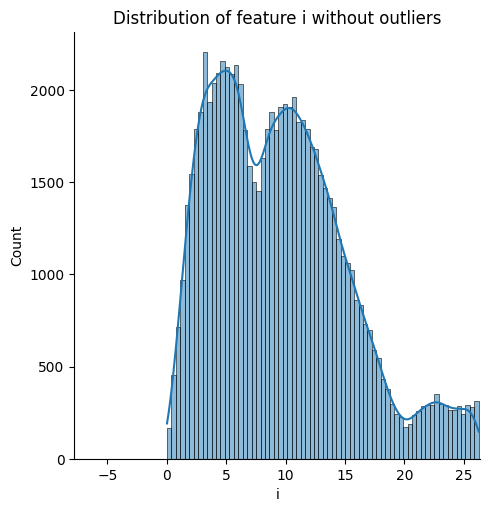

In [ ]:
X_train = outlier_control(X_train, 'i', plot = True, ret = True)

25% Quantile for a: 2.481333120756169
75% Quantile for a: 3.0698624296967623
The limit for a is 1.5985391573452787 <= i <= 3.9526563931076524
Samples outside the range: 522
Samples inside the range: 77721


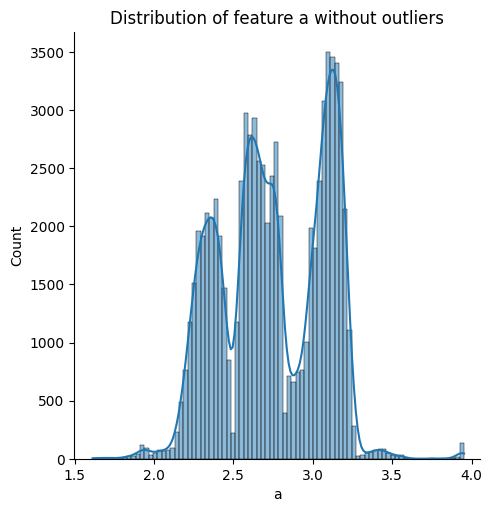

In [ ]:
X_train = outlier_control(X_train, 'a', plot = True, ret = True)

In [ ]:
num_features = X.drop(['orbit_id', 'class', 'producer'], axis = 1).columns
num_features

Index(['e', 'a', 'i', 'om', 'w', 'ma', 'n', 'tp', 'moid', 'moid_jup',
       'data_arc', 'n_obs_used', 'rms', 'albedo', 'diameter_sigma',
       'first_year_obs', 'first_month_obs', 'last_obs_year', 'last_obs_month'],
      dtype='object')

25% Quantile for n: 0.1834304161878173
75% Quantile for n: 0.2519598419728325
The limit for n is 0.08063627751029451 <= i <= 0.3547539806503553
Samples outside the range: 368
Samples inside the range: 77353


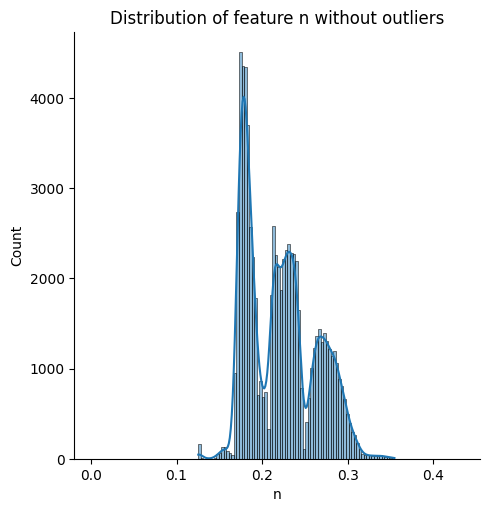

In [ ]:
X_train = outlier_control(X_train, 'n', plot = True, ret = True)

25% Quantile for data_arc: 6339.0
75% Quantile for data_arc: 9458.0
The limit for data_arc is 1660.5 <= i <= 14136.5
Samples outside the range: 10759
Samples inside the range: 66594


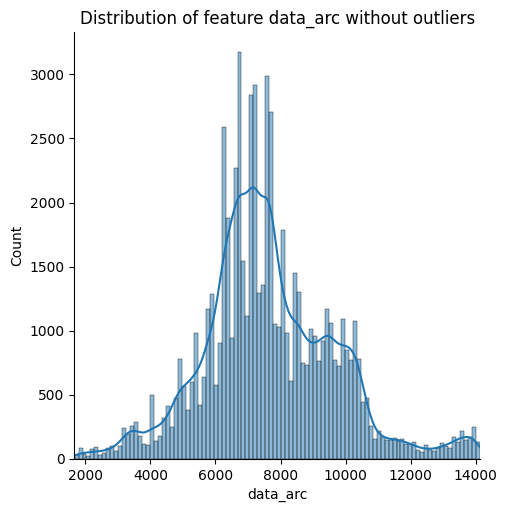

In [ ]:
X_train = outlier_control(X_train, 'data_arc', plot = True, ret = True)

#### The distributions look much cleaner after removing the outliers

In [ ]:
# To match the samples removed by outlier removal
y_train = y_train.loc[X_train.index]
print(f"X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}")

X_train shape: (66594, 22)
y_train shape: (66594,)


25% Quantile for first_year_obs: 1995.0
75% Quantile for first_year_obs: 2001.0
The limit for first_year_obs is 1986.0 <= i <= 2010.0
Samples outside the range: 1913
Samples inside the range: 64681


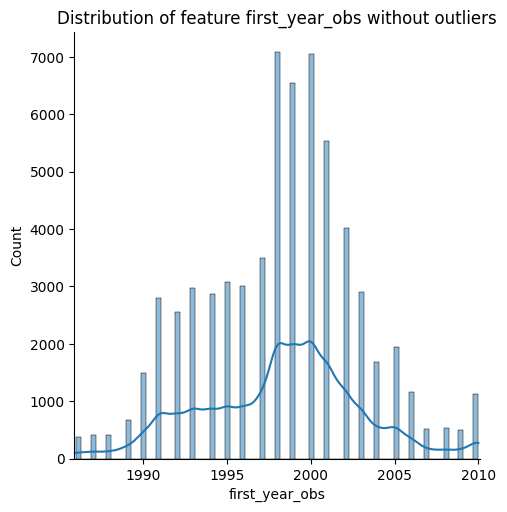

In [ ]:
outlier_control(X_train, 'first_year_obs', plot = True)

### Analysing Feature Correlation

<ipython-input-38-cb8991bfcdb4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  map = sns.heatmap(X_train.corr(), vmin = -1, vmax = 1, annot = True)


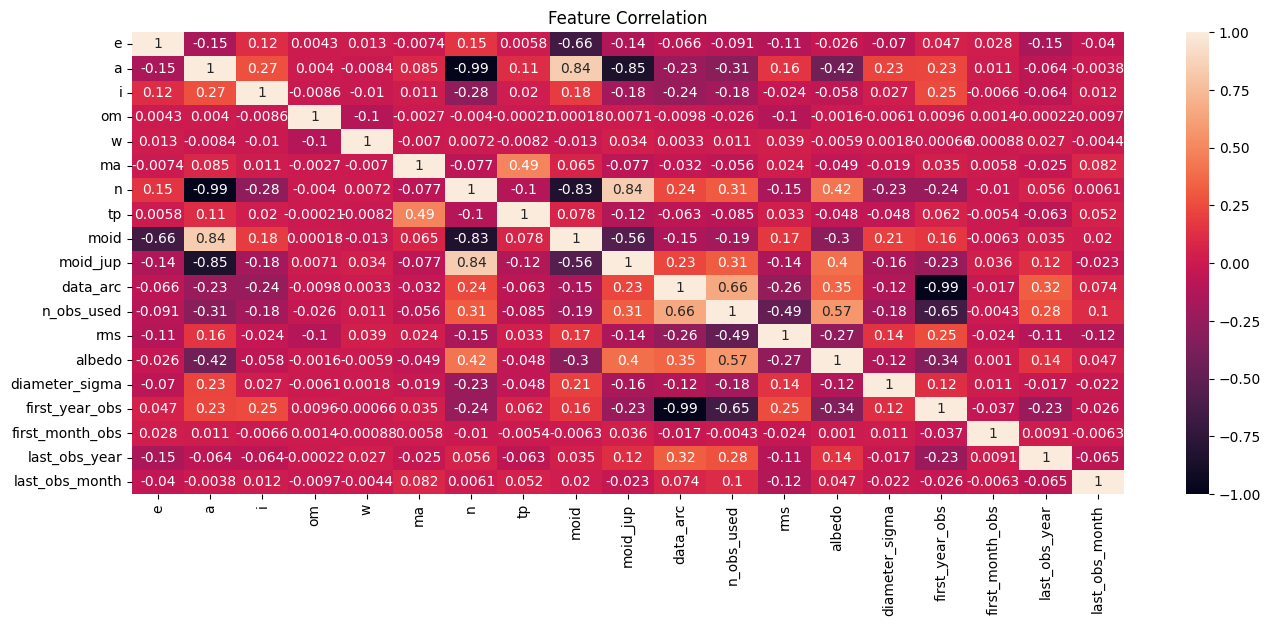

In [ ]:
plt.figure(figsize = (16, 6))

# Plot correlation matrix
map = sns.heatmap(X_train.corr(), vmin = -1, vmax = 1, annot = True)
map.set_title("Feature Correlation")
plt.savefig("correlation_plot.png", dpi = 300)

#### Some of these values are already really high, indicating multicollinearity in the data.


#### Let's look at the highest ones

<ipython-input-39-98e8e0a8d143>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = X_train.corr()


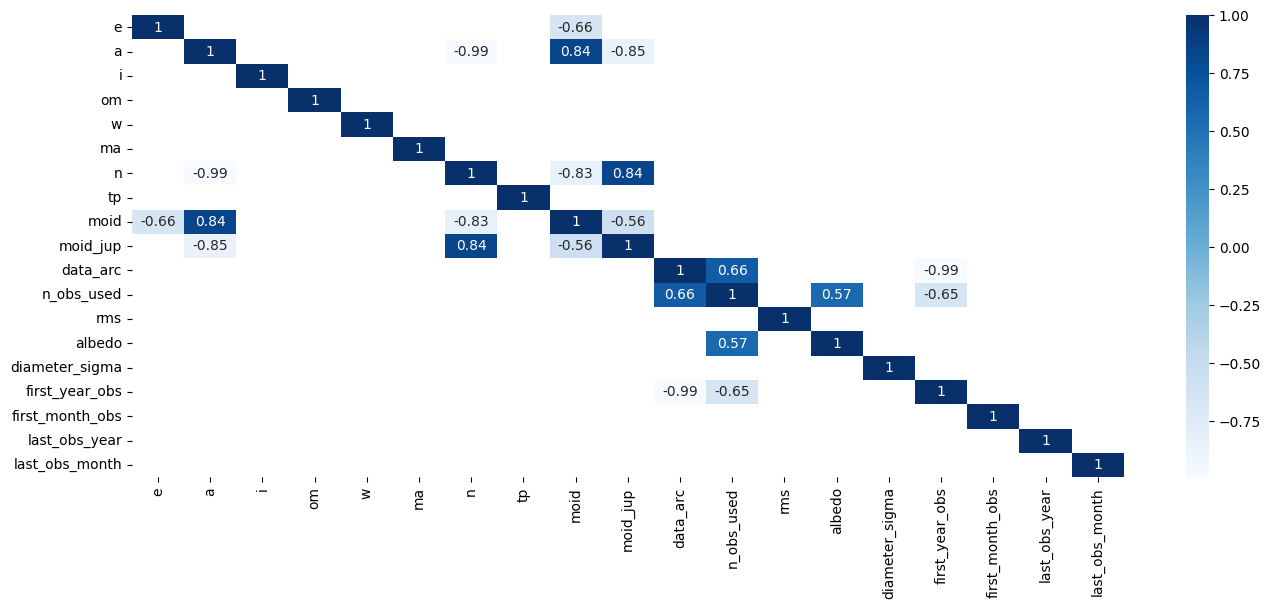

In [ ]:
corr = X_train.corr()

# Matrix with only high correlated >0.5 variables highlighted
high_corr = corr[((corr <= 0.5) & (corr >= -0.5)) & corr !=  1]
# mask = np.triu(np.ones_like(high_corr))
plt.figure(figsize = (16, 6))
sns.heatmap(high_corr, annot = True, cmap = "Blues")
plt.savefig("high_corr_plot.png", dpi = 300)

In [ ]:
# Helper function to plot the correlation between two variables
def plot_corr(data, x, y):
    sns.jointplot(data, x = x, y = y)
    plt.title(f"Feature {x} vs {y} plot : Correlation {corr[x][y]}", x = 0.5, y = -.2)
    plt.savefig(f"{x}vs{y}plot.png", dpi = 300)

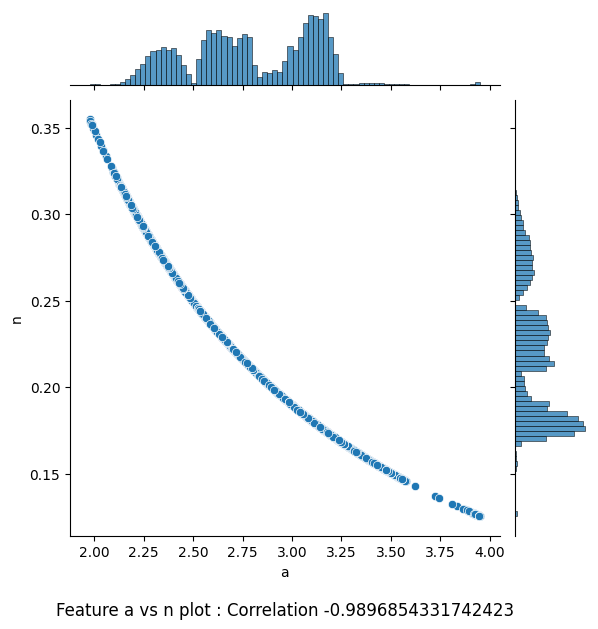

In [ ]:
plot_corr(X_train, 'a', 'n')

#### These features seem to contain no noise at all, they look almost perfectly correlated.

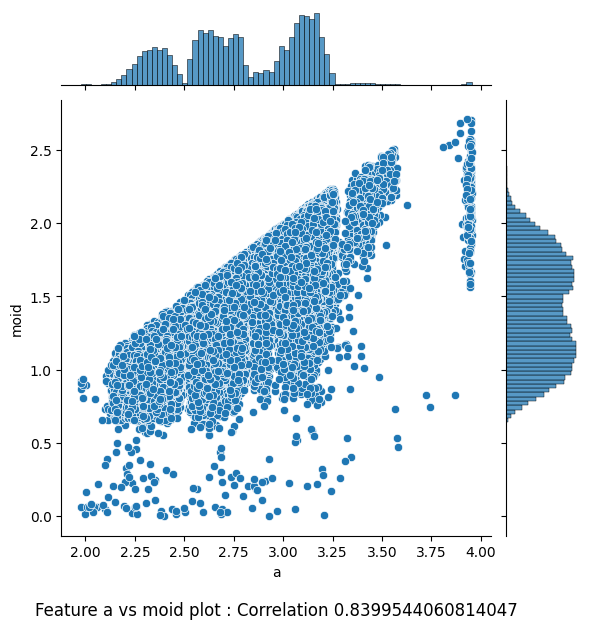

In [ ]:
plot_corr(X_train, 'a', 'moid')

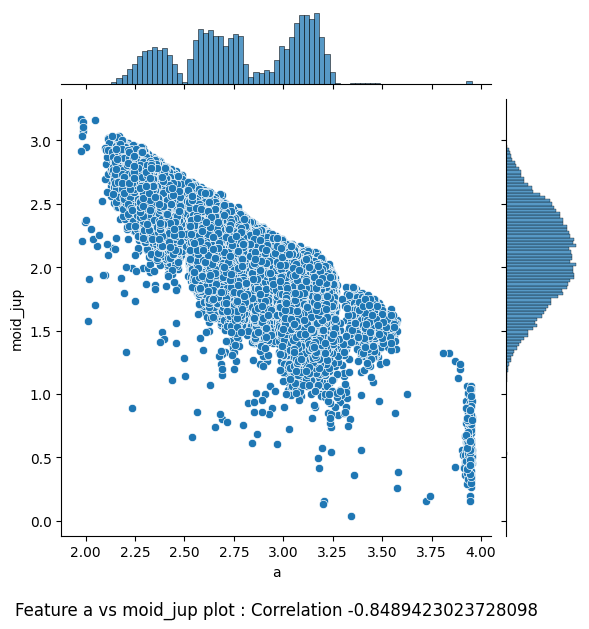

In [ ]:
plot_corr(X_train, 'a', 'moid_jup')

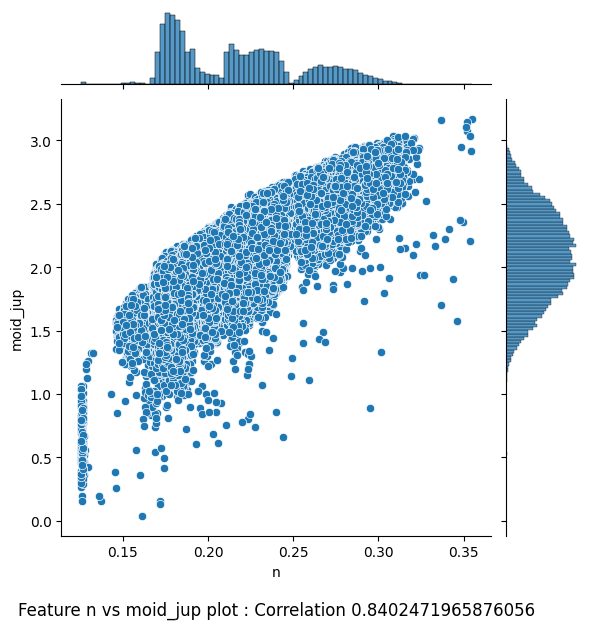

In [ ]:
plot_corr(X_train, 'n', 'moid_jup')

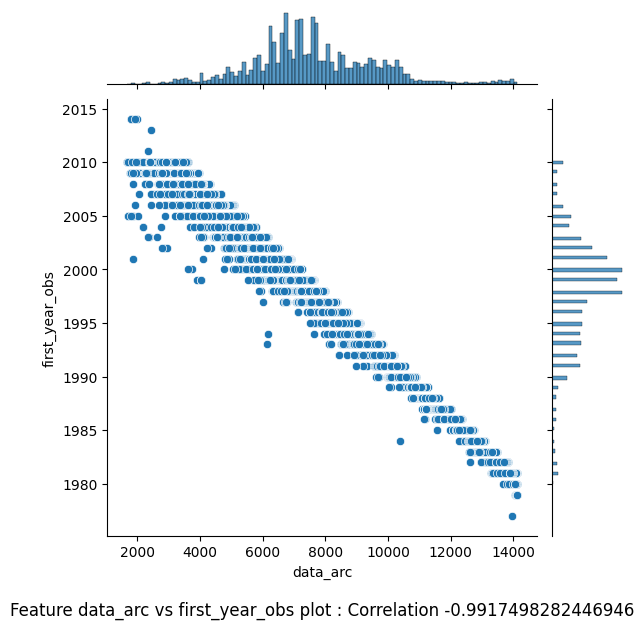

In [ ]:
plot_corr(X_train, 'data_arc', 'first_year_obs')

#### data_arc and first_year_obs are perfectly correlated. Maybe because the earlier the first observation took place, the longer that asteroid has been monitored?

### A binning approach to the year features

#### I followed a binning approach for the first_year_obs and last_obs_year features using 2 bins each.

#### This does not seem to perform that well as the last_obs_year is heavily skewed.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# To bin the dates into two bins each, using kmeans strategy
binner = KBinsDiscretizer(n_bins = 2, subsample = None, strategy = 'kmeans', encode = "onehot-dense")
binned_years = binner.fit_transform(X_train[['first_year_obs', 'last_obs_year']])

In [ ]:
new = pd.DataFrame.from_dict({'first_year_obs' : [1982, 2014], 'last_obs_year' : [1977, 2019]})
binner.transform(new)

array([[1., 0., 1., 0.],
       [0., 1., 0., 1.]])

In [ ]:
# The decision boundary for the bins
binner.bin_edges_

array([array([1977.        , 1995.91415563, 2014.        ]),
       array([2006.        , 2017.64306237, 2019.        ])], dtype=object)

In [ ]:
year_cols = ['first_year_obs <= 1983',  'first_year_obs > 1983',
        'last_year_obs <= 2014',  'last_year_obs > 2014']

In [ ]:
# Creating dataframe to visualize bins
binned_years_pd = pd.DataFrame(data = binned_years, columns = year_cols, index = X_train[['first_year_obs', 'last_obs_year']].index)
binned_years_pd.shape

(66594, 4)

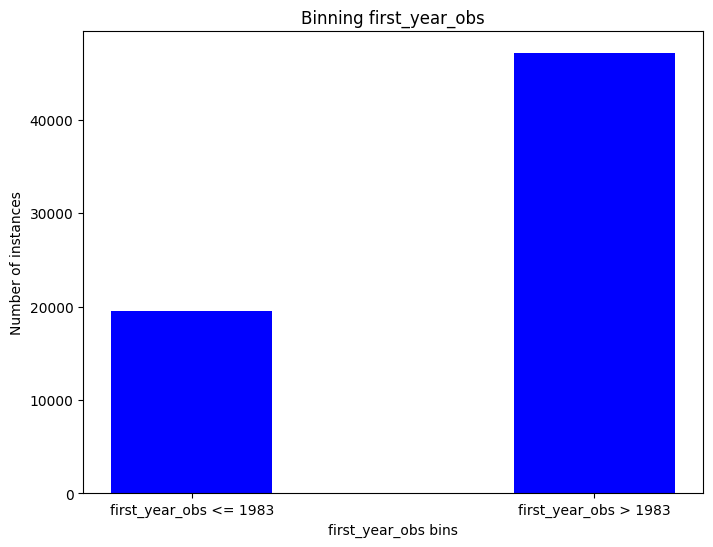

In [ ]:
plt.figure(figsize = (8, 6))
plt.bar(binned_years_pd.sum()[:2].index, binned_years_pd.sum()[:2].values, color ='blue',
        width = 0.4)
plt.ylabel("Number of instances")
plt.xlabel("first_year_obs bins")
plt.title("Binning first_year_obs")
plt.savefig("first_year_obs_binned.png")
plt.show()

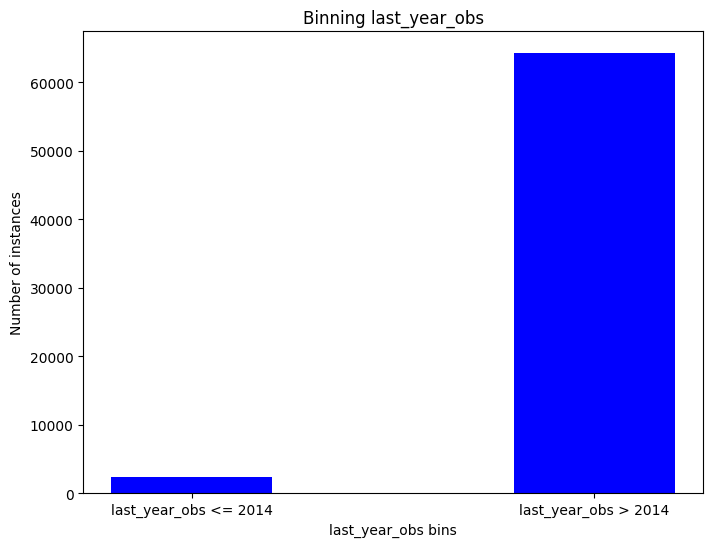

In [ ]:
plt.figure(figsize = (8, 6))
plt.bar(binned_years_pd.sum()[2:].index, binned_years_pd.sum()[2:].values, color ='blue',
        width = 0.4)
plt.ylabel("Number of instances")
plt.xlabel("last_year_obs bins")
plt.title("Binning last_year_obs")
plt.savefig("last_year_obs_binned.png")
plt.show()

#### Binning does not seem to make much change here, the only notable change is that it gets rid of those features as numerical

### Data preprocessing pipelines

#### Since we want to test and find out the best model, it isn't obvious which data preprocessing technique is the best, so we will implement three of them.

1. All features ordinally encoded
2. Only orbit_id ordinally encoded, all others one-hot encoded
3. All features one-hot encoded

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.8 MB/s eta 0:00:00


In [ ]:
cat_cols = ['class', 'producer']
date_cols = ['first_month_obs', 'last_obs_month']
num_cols = list(X_train.drop(cat_cols + date_cols + ['first_year_obs', 'last_obs_year', 'orbit_id'], axis = 1).columns)

In [ ]:
from sklearn.pipeline import Pipeline       # To create preprocessing pipelines
from sklearn.compose import ColumnTransformer   # To apply different techniques to different cols
import category_encoders as ce                  # For encoding
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

sklearn.set_config(transform_output="pandas")

# Standard pipeline for numerical features
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
])

# Pipeline 1 - Ordinal Encode everything
pipeline1 = ColumnTransformer(
    [("Numerical Preprocess", num_pipeline, num_cols + ['first_year_obs', 'last_obs_year']),
     ("Categorical Preprocess", OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = -1), cat_cols + ['orbit_id'])]
)

# Pipeline 2 - Ordinal Encode orbit_id, one-hot encode everything
pipeline2 = ColumnTransformer([
    ("num", num_pipeline, num_cols + ['first_year_obs', 'last_obs_year']),
    ("ordinal", OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = -1), ['orbit_id']),
     ("onehot", OneHotEncoder(sparse_output = False, handle_unknown = "ignore"), cat_cols[1:])]
)

# Pipeline 3 - One-hot encode everything
pipeline3 = ColumnTransformer(
    [("num", num_pipeline, num_cols + ['first_year_obs', 'last_obs_year']),
     ("onehot", OneHotEncoder(sparse_output = False, handle_unknown = "ignore"), cat_cols  + ['orbit_id'])]
)

pipelines = [pipeline1, pipeline2, pipeline3]

In [ ]:
pipeline1

ColumnTransformer(transformers=[('Numerical Preprocess',
                                 Pipeline(steps=[('std_scaler',
                                                  StandardScaler())]),
                                 ['e', 'a', 'i', 'om', 'w', 'ma', 'n', 'tp',
                                  'moid', 'moid_jup', 'data_arc', 'n_obs_used',
                                  'rms', 'albedo', 'diameter_sigma',
                                  'first_year_obs', 'last_obs_year']),
                                ('Categorical Preprocess',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['class', 'producer', 'orbit_id'])])

In [ ]:
pipeline2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('std_scaler',
                                                  StandardScaler())]),
                                 ['e', 'a', 'i', 'om', 'w', 'ma', 'n', 'tp',
                                  'moid', 'moid_jup', 'data_arc', 'n_obs_used',
                                  'rms', 'albedo', 'diameter_sigma',
                                  'first_year_obs', 'last_obs_year']),
                                ('ordinal',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['orbit_id']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['producer'])])

In [ ]:
pipeline3

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('std_scaler',
                                                  StandardScaler())]),
                                 ['e', 'a', 'i', 'om', 'w', 'ma', 'n', 'tp',
                                  'moid', 'moid_jup', 'data_arc', 'n_obs_used',
                                  'rms', 'albedo', 'diameter_sigma',
                                  'first_year_obs', 'last_obs_year']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['class', 'producer', 'orbit_id'])])

# 3. Training and Evaluation

#### The function below makes it easier by training and evaluating the model on data using all three pipelines and printing relevant error metrics

In [ ]:
# Helper function to automatically train model on all pipelines and print relevant metrics
def train_and_eval(model, name):
    print(f"[!] Training {name} model!\n")
    for num, i in enumerate(pipelines):
        pipeline = i
        print(f"\n[*] Preprocessing using Pipeline {num + 1}")
        data = pipeline.fit_transform(X_train)
        model.fit(data, y_train)
        print_metrics(model, pipeline)

### Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet

linear_reg = LinearRegression()
train_and_eval(linear_reg, "Linear Regression")

[!] Training Linear Regression model!


[*] Preprocessing using Pipeline 1
[*] VALIDATION SET PERFORMANCE
Mean Absolute Error: 0.77 kilometers
Mean Squared Error: 3.41 kilometers
Root Mean Squared Error: 1.85 kilometers
Mean Absolute Percentage Error: 26.26%
R2 Score: 8.55%

[*] Preprocessing using Pipeline 2
[*] VALIDATION SET PERFORMANCE
Mean Absolute Error: 0.78 kilometers
Mean Squared Error: 3.95 kilometers
Root Mean Squared Error: 1.99 kilometers
Mean Absolute Percentage Error: 26.65%
R2 Score: -5.95%

[*] Preprocessing using Pipeline 3
[*] VALIDATION SET PERFORMANCE
Mean Absolute Error: 0.75 kilometers
Mean Squared Error: 3.23 kilometers
Root Mean Squared Error: 1.80 kilometers
Mean Absolute Percentage Error: 26.32%
R2 Score: 13.58%


### Elastic Net Model

In [ ]:
elastic_net = ElasticNet(l1_ratio = 0.1)

train_and_eval(elastic_net, "Elastic Net")

[!] Training Elastic Net model!


[*] Preprocessing using Pipeline 1
[*] VALIDATION SET PERFORMANCE
Mean Absolute Error: 1.01 kilometers
Mean Squared Error: 1.81 kilometers
Root Mean Squared Error: 1.34 kilometers
Mean Absolute Percentage Error: 32.68%
R2 Score: 51.58%

[*] Preprocessing using Pipeline 2
[*] VALIDATION SET PERFORMANCE
Mean Absolute Error: 1.01 kilometers
Mean Squared Error: 1.81 kilometers
Root Mean Squared Error: 1.34 kilometers
Mean Absolute Percentage Error: 32.68%
R2 Score: 51.58%

[*] Preprocessing using Pipeline 3
[*] VALIDATION SET PERFORMANCE
Mean Absolute Error: 1.01 kilometers
Mean Squared Error: 1.81 kilometers
Root Mean Squared Error: 1.35 kilometers
Mean Absolute Percentage Error: 32.76%
R2 Score: 51.39%


### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(criterion = "squared_error", max_depth=25, min_samples_leaf=25, min_samples_split=50)
train_and_eval(decision_tree, "Decision Tree")

[!] Training Decision Tree model!


[*] Preprocessing using Pipeline 1
[*] VALIDATION SET PERFORMANCE
Mean Absolute Error: 0.55 kilometers
Mean Squared Error: 0.62 kilometers
Root Mean Squared Error: 0.79 kilometers
Mean Absolute Percentage Error: 16.36%
R2 Score: 83.26%

[*] Preprocessing using Pipeline 2
[*] VALIDATION SET PERFORMANCE
Mean Absolute Error: 0.55 kilometers
Mean Squared Error: 0.62 kilometers
Root Mean Squared Error: 0.79 kilometers
Mean Absolute Percentage Error: 16.36%
R2 Score: 83.26%

[*] Preprocessing using Pipeline 3
[*] VALIDATION SET PERFORMANCE
Mean Absolute Error: 0.55 kilometers
Mean Squared Error: 0.62 kilometers
Root Mean Squared Error: 0.79 kilometers
Mean Absolute Percentage Error: 16.35%
R2 Score: 83.26%


In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, HistGradientBoostingRegressor

random_forest = RandomForestRegressor(n_jobs = -1)
train_and_eval(random_forest, "Random Forest")

[!] Training Random Forest model!


[*] Preprocessing using Pipeline 1
[*] VALIDATION SET PERFORMANCE
Mean Absolute Error: 0.45 kilometers
Mean Squared Error: 0.43 kilometers
Root Mean Squared Error: 0.65 kilometers
Mean Absolute Percentage Error: 13.13%
R2 Score: 88.53%

[*] Preprocessing using Pipeline 2
[*] VALIDATION SET PERFORMANCE
Mean Absolute Error: 0.45 kilometers
Mean Squared Error: 0.43 kilometers
Root Mean Squared Error: 0.65 kilometers
Mean Absolute Percentage Error: 13.22%
R2 Score: 88.54%

[*] Preprocessing using Pipeline 3
[*] VALIDATION SET PERFORMANCE
Mean Absolute Error: 0.45 kilometers
Mean Squared Error: 0.43 kilometers
Root Mean Squared Error: 0.66 kilometers
Mean Absolute Percentage Error: 13.10%
R2 Score: 88.48%


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(verbosity = 1)
train_and_eval(xgb, "XG Boost")

[!] Training XG Boost model!


[*] Preprocessing using Pipeline 1
[*] VALIDATION SET PERFORMANCE
Mean Absolute Error: 0.44 kilometers
Mean Squared Error: 0.40 kilometers
Root Mean Squared Error: 0.63 kilometers
Mean Absolute Percentage Error: 12.97%
R2 Score: 89.37%

[*] Preprocessing using Pipeline 2
[*] VALIDATION SET PERFORMANCE
Mean Absolute Error: 0.45 kilometers
Mean Squared Error: 0.41 kilometers
Root Mean Squared Error: 0.64 kilometers
Mean Absolute Percentage Error: 13.13%
R2 Score: 89.10%

[*] Preprocessing using Pipeline 3
[*] VALIDATION SET PERFORMANCE
Mean Absolute Error: 0.44 kilometers
Mean Squared Error: 0.41 kilometers
Root Mean Squared Error: 0.64 kilometers
Mean Absolute Percentage Error: 12.65%
R2 Score: 89.14%


##### It seems that the best model we have got is the XG Boost Regressor. We will try to achieve a higher score using RandomizedSearchCV.

##### We will choose pipeline 1 for hyperparameter tuning as it exhibited the best performance for the XGBoost Regressor.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter distribution grid
param_grid = {
    'n_estimators' : [20, 50, 100, 200],
    'max_depth' : [None, 5, 15, 50],
    'max_leaves' : [0, 5, 15, 50],
    'learning_rate' : [None, 0.001, 0.0001, 0.00001]
}

xgb = XGBRegressor()

rcv = RandomizedSearchCV(xgb, param_grid, n_jobs = -1, random_state = 42)
X_train_pipeline_1 = pipeline1.fit_transform(X_train)
X_val_pipeline_1 = pipeline1.transform(X_val)

rcv.fit(X_train_pipeline_1, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [None, 0.001, 0.0001,
                                                          1e-05],
                                        'max_depth': [None, 5, 15, 50],
                                        'max_leaves': [0, 5, 15, 50],
                                        'n_estimators': [20, 50, 100, 200]},
                   random_state=42)

In [ ]:
print_metrics(rcv, pipeline = pipeline1)

[*] VALIDATION SET PERFORMANCE
Mean Absolute Error: 0.44 kilometers
Mean Squared Error: 0.40 kilometers
Root Mean Squared Error: 0.63 kilometers
Mean Absolute Percentage Error: 12.97%
R2 Score: 89.37%


In [ ]:
xgb_best = XGBRegressor(base_score=0.5, booster='gbtree', gamma=0,
             importance_type='gain', learning_rate=0.1,
             max_depth=7, n_estimators=1000,
             n_jobs=-1,objective='reg:squarederror',
             random_state=42)
xgb_best.fit(X_train_pipeline_1, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type='gain',
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
print_metrics(xgb_best, pipeline = pipeline1)

[*] VALIDATION SET PERFORMANCE
Mean Absolute Error: 0.42 kilometers
Mean Squared Error: 0.37 kilometers
Root Mean Squared Error: 0.61 kilometers
Mean Absolute Percentage Error: 12.38%
R2 Score: 90.06%


In [ ]:
xgb_best.feature_importances_

array([0.00304518, 0.25269476, 0.04506421, 0.01011964, 0.00412901,
       0.007989  , 0.        , 0.0146023 , 0.02299962, 0.0044945 ,
       0.00708004, 0.3230488 , 0.01008868, 0.22387935, 0.02269446,
       0.01590875, 0.00875718, 0.01880053, 0.        , 0.00460404],
      dtype=float32)

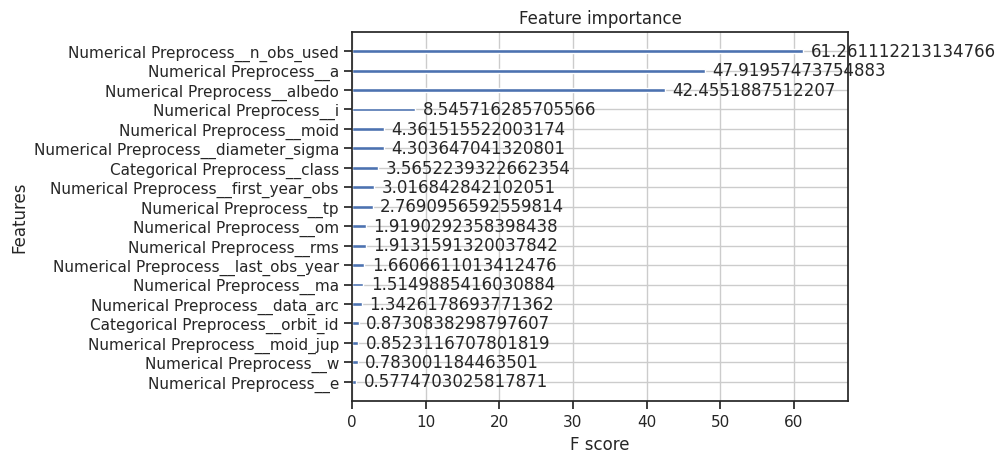

In [ ]:
from xgboost import plot_importance

# Plot the feature importances obtained through XGB
plot_importance(xgb_best, importance_type = "gain")
plt.savefig("feature_importances.png", dpi = 300)

As we know that tree-based algorithms can calculate feature importances during training itself, the above plot shows the feature importances calculated by the XGBRegressor

At a first glance itself, we can see that three features stand out from the rest, namely "a", "n_obs_used" and "albedo".

Following those are the "i" and "moid" features.

The ordinally encoded categorical features aren't performing as well, as our model cannot learn anything from them.

## Model Explanation using SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 3.4 MB/s eta 0:00:00


In [ ]:
import shap
sns.set(style='ticks')

# Create a shap explainer and fit it on the entire input data
explainer = shap.Explainer(xgb_best, X_train_pipeline_1)
shap_values = explainer(X_train_pipeline_1)

100%|===================| 66586/66594 [62:47<00:00]       

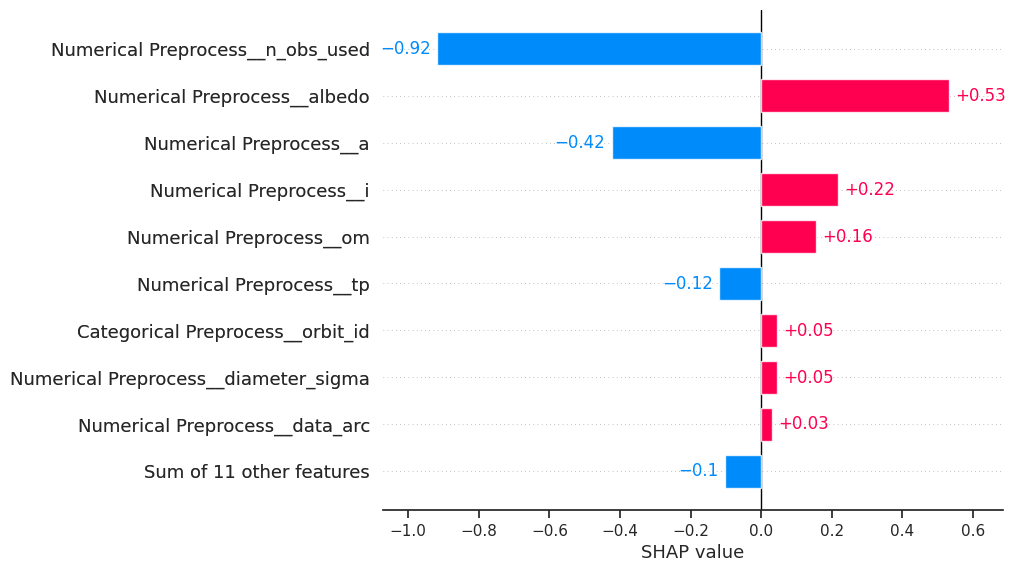

In [ ]:
# Model output explanation for the 5th data point
shap.plots.bar(shap_values[5])

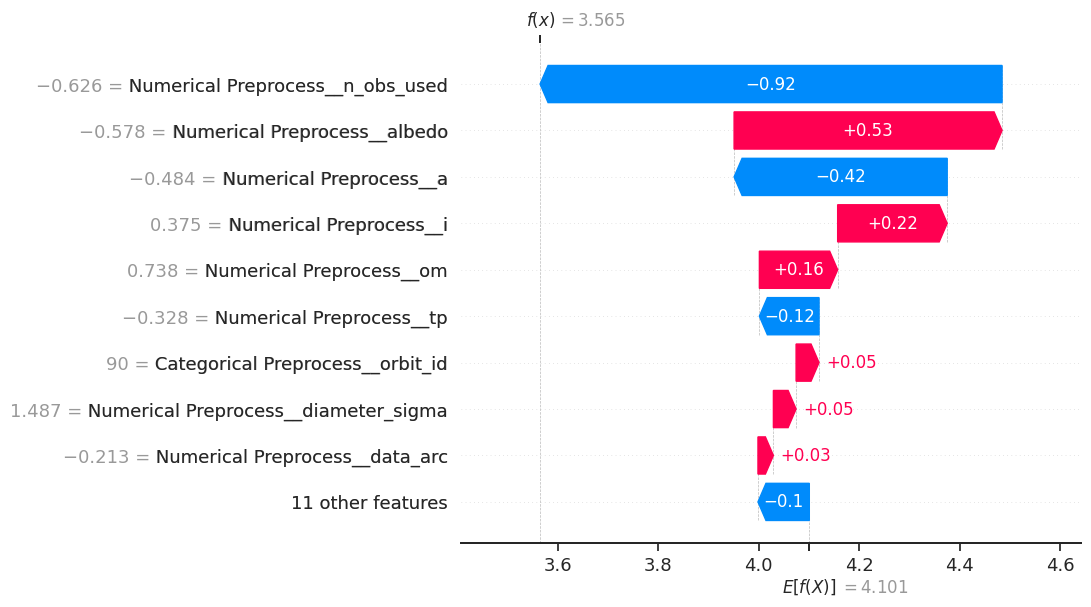

<Figure size 640x480 with 0 Axes>

In [ ]:
shap.plots.waterfall(shap_values[5])
plt.savefig("shap_explain.png", dpi = 300)

In [ ]:
# Zipping the column name with its corresponding shap value for the 5th sample
vals = zip(shap_values.values[5], X_train_pipeline_1.columns)
vals = sorted(vals)

In [ ]:
print("[!] Top three features that contributed positively: ")
for i, j in vals[-3:]:
    print(f"{j.split('__')[1]} contributed {i} km to the output.")
print("\n[!] Top three features that contributed negatively: ")
for i, j in vals[:3]:
    print(f"{j.split('__')[1]} contributed {i} km to the output.")

[!] Top three features that contributed positively: 
om contributed 0.1557458757923564 km to the output.
i contributed 0.21790064854819322 km to the output.
albedo contributed 0.5330864443833707 km to the output.

[!] Top three features that contributed negatively: 
n_obs_used contributed -0.919058038938947 km to the output.
a contributed -0.42393750193036794 km to the output.
tp contributed -0.1186790649544173 km to the output.


To summarize it all, we will take the mean of all shapley values for all features and then see which have contributed most on an average basis.

In [ ]:
# Taking the mean of shap values for all columns
vals = zip(shap_values.values.mean(axis = 1), X_train_pipeline_1.columns)
vals = sorted(vals)

In [ ]:
print("[!] Top three features that contributed positively: ")
for i, j in vals[-3:]:
    print(f"{j.split('__')[1]} contributed {i} km to the output.")
print("\n[!] Top three features that contributed negatively: ")
for i, j in vals[:3]:
    print(f"{j.split('__')[1]} contributed {i} km to the output.")

[!] Top three features that contributed positively: 
moid contributed 0.18568781138748763 km to the output.
e contributed 0.18984676929411398 km to the output.
n contributed 0.20716531625877121 km to the output.

[!] Top three features that contributed negatively: 
w contributed -0.11167987919851827 km to the output.
last_obs_year contributed -0.08914713189304052 km to the output.
first_year_obs contributed -0.073997639235738 km to the output.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


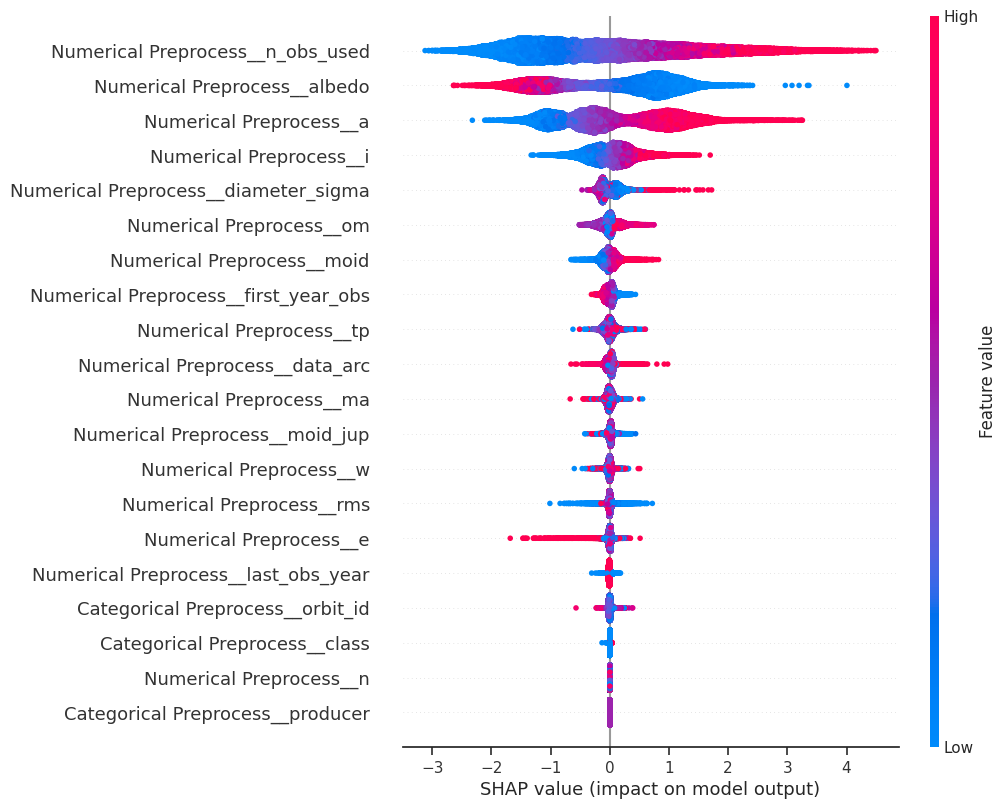

<Figure size 640x480 with 0 Axes>

In [ ]:
# Final summary plot
shap.plots.beeswarm(shap_values, max_display=20)
plt.savefig("shap_explaination.png", dpi = 300)

So many observations can be made from the plot above! Some are as follows:

1. n_obs_used shows a consistent increase in the SHAP value with increase in its value
2. albedo consists of a few outliers but otherwise, no other outliers throughout the data can be seen
3. "e" has a strong negative impact when it has a high value
4. "n" and "producer" have almost no effect on the output variable.
5. "diameter_sigma" has a strong positive impact when it has a high value

## Final performance on the test dataset!

In [ ]:
print_metrics(xgb_best, pipeline = pipeline1, test = True)

[*] TEST SET PERFORMANCE
Mean Absolute Error: 0.41 kilometers
Mean Squared Error: 0.36 kilometers
Root Mean Squared Error: 0.60 kilometers
Mean Absolute Percentage Error: 12.06%
R2 Score: 90.42%


Performs even better than the validation set!